In [2]:
# import libraries
import os
import time
import h5py
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"text.usetex": True})
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import viewer
import pandas as pd
import blimpy

import matplotlib
# matplotlib.use('TkAgg')
%matplotlib inline

kj/filesystem-disk-unix.c++:1734: warning: PWD environment variable doesn't match current directory; pwd = /home/njbal


In [3]:
# Backends for matplotlib
# ['GTK3Agg', 'GTK3Cairo', 'GTK4Agg', 'GTK4Cairo', 'MacOSX', 'nbAgg', 'QtAgg', 'QtCairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


In [4]:
# Assembling and organising file names
files_list = np.array(os.listdir())
h5_data_list = []
for x in files_list:
    if '.h5' in x:
        h5_data_list.append(x)
    else:
        continue
meerkat_bfr5 = 'MeerKAT-array_1-20240520T013741Z-original.bfr5'

In [5]:
# define a few useful functions:
def open_data(fname):
    h = h5py.File(fname, 'r') # open data
#     print(fname)
    file_info = blimpy.h5diag.read_header(h)


    ds = h['data']
    arr = ds[()] # dataset
    power_arr = np.squeeze(arr, axis=1)
#     print('Data shape:', power_arr.shape)
    h.close()
    
    return power_arr, file_info


def calc_freq_t_arrays(file_info, power_arr_shape):
    # # Extracting file information
    tsamp = file_info['tsamp']
    tstart = file_info['tstart']
    fch1 = file_info['fch1'] # first channel freq
    foff = file_info['foff'] # frequency offset
    
    # Printing file info
    print('File info:')
    for info in file_info: 
        print(f'{info}: {file_info[info]}')    
    freq_arr = np.arange(0, power_arr_shape[1], 1)*foff + fch1
    t_arr = np.arange(0, power_arr_shape[0], 1)*tsamp + tstart    
    return freq_arr, t_arr

def plot_mean_power_vs_t(t_arr, power_sum_t, fname):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(t_arr, power_mean_t, lw=1)
    ax.set_ylabel(r'$\mathrm {Total \ power \ sum}$')
    ax.set_xlabel(r'$\mathrm {MJD}$')
    fig.tight_layout()
    plt.savefig(os.path.abspath(fr'power_plots/{fname[:-3]}/mean_power_vs_t.png'))
    plt.show()

def plot_sum_power_vs_t(t_arr, power_sum_t, fname):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(t_arr, power_sum_t, lw=1)
    ax.set_ylabel(r'$\mathrm {Total \ power \ sum}$')
    ax.set_xlabel(r'$\mathrm {MJD}$')
    fig.tight_layout()
    plt.savefig(os.path.abspath(fr'power_plots/{fname[:-3]}/sum_power_vs_t.png'))
    plt.show()

def plot_sum_power_vs_freq(freq_arr, power_sum_freq, fname):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(freq_arr, power_sum_freq, lw=1)
    ax.set_ylabel(r'$\mathrm {Total \ power \ sum}$')
    ax.set_xlabel(r'$\mathrm {Frequency \ [MHz]}$')
    fig.tight_layout()
    plt.savefig(os.path.abspath(fr'power_plots/{fname[:-3]}/sum_power_vs_freq.png'))
    plt.show()

def plot_mean_power_vs_freq(freq_arr, power_mean_freq, fname):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(freq_arr, power_mean_freq, lw=1)
    ax.set_ylabel(r'$\mathrm {Mean \ power}$')
    ax.set_xlabel(r'$\mathrm {Frequency \ [MHz]}$')
    fig.tight_layout()
    plt.savefig(os.path.abspath(fr'power_plots/{fname[:-3]}/mean_power_vs_freq.png'))
    plt.show()


In [6]:
# calculate max power over all beams

max_power_arr = []
for fname in h5_data_list:
    power_arr, file_info = open_data(fname)
    power_sum_freq  = np.sum(power_arr, axis=0)
    power_mean_freq = np.mean(power_arr, axis=0)
    power_sum_t     = np.sum(power_arr, axis=1)
    power_mean_t    = np.mean(power_arr, axis=1)
    max_power_arr.append([power_sum_freq.max(), power_mean_freq.max(), power_sum_t.max(), power_mean_t.max()])


max_power_arr = np.array(max_power_arr)
max_powers = max_power_arr.max(axis=0)

guppi_60450_05861_003791_JWST_0001.band01.beam40.h5

File info:
fch1: 2270.2789306640625
foff: 1.6298145055770874e-06
nfpc: 131072
source_name: Gaia_4060291146327589376
src_dej: -28.96342629411557 deg
src_raj: 17.580335670617732 hourangle
telescope_id: 64
tsamp: 4.9085340525714285
tstart: 60450.06783880672
guppi_60450_05861_003791_JWST_0001.band01.beam00.h5

File info:
fch1: 2270.2789306640625
foff: 1.6298145055770874e-06
nfpc: 131072
source_name: JWST
src_dej: -29.15975 deg
src_raj: 17.57012777777778 hourangle
telescope_id: 64
tsamp: 4.9085340525714285
tstart: 60450.06783880672
guppi_60450_05861_003791_JWST_0001.band00.beam00.h5

File info:
fch1: 2269.4244384765625
foff: 1.6298145055770874e-06
nfpc: 131072
source_name: JWST
src_dej: -29.15975 deg
src_raj: 17.57012777777778 hourangle
telescope_id: 64
tsamp: 4.9085340525714285
tstart: 60450.06783880672
guppi_60450_05861_003791_JWST_0001.band01.beam08.h5

File info:
fch1: 2270.2789306640625
foff: 1.6298145055770874e-06
nfpc: 131072
sourc

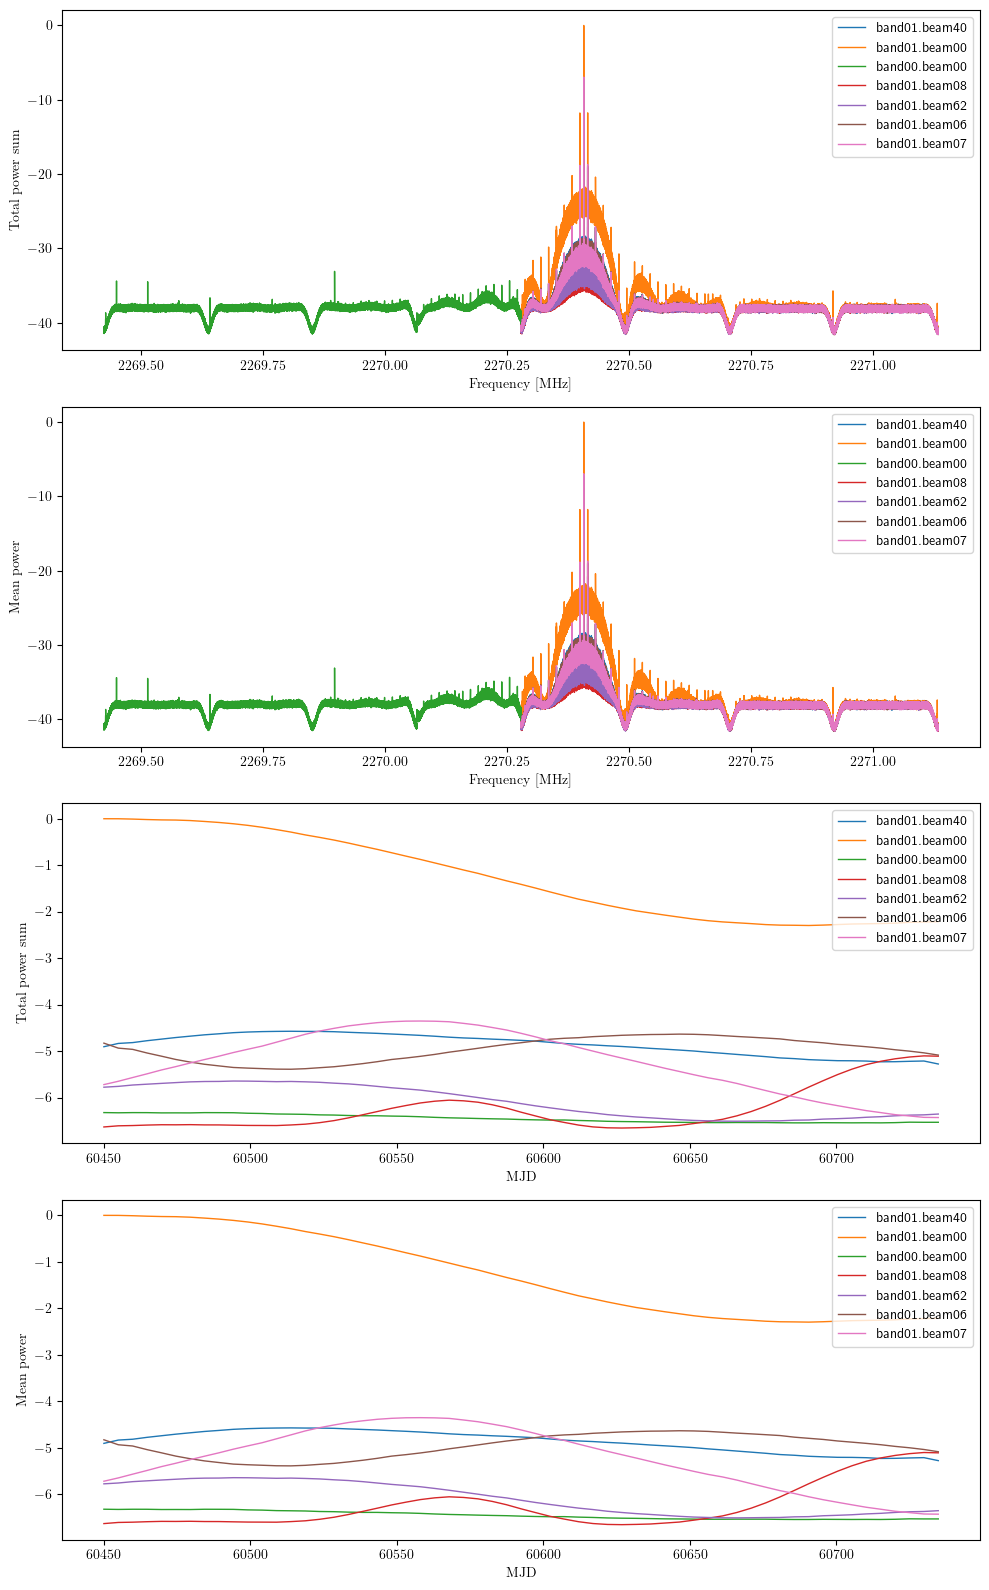

In [21]:

# Plotting power as function of frequency and time
beam_mean_db = np.array([]) # take mean of the mean powers in t
beam_ras, beam_decs = np.array([]), np.array([])
beam_names = np.array([])

fig, ax = plt.subplots(4,1, figsize=(10,16))
for fname in h5_data_list:
    power_arr, file_info = open_data(fname)
    print(fname)
    print('')
    freq_arr, t_arr = calc_freq_t_arrays(file_info, power_arr.shape)
#     n_vals = np.linspace(0, power_arr.shape[-1], 129, dtype=int)
#     for i in range(n_vals.size-1):
#         n_0, n_f = n_vals[i], n_vals[i+1]
#         print(n_0, n_f)
#         fig, ax = plt.subplots(figsize=(10,2))
#         ax.imshow(power_arr[:,n_0:n_f], 
#                   cmap = 'viridis', 
#                   extent = [fch1 + foff*n_0, 
#                             fch1 + foff*n_f, tstart, tstart + tsamp*power_arr.shape[0]], 
#                   aspect='auto')
#         ax.set_xlabel(r'$\mathrm{Frequency \ [MHz]}$')
#         ax.set_ylabel(r'$\mathrm {MJD}$')
#         fig.tight_layout()
#         plt.savefig(os.path.abspath(fr'possible_signals/{fname[:-3]}/{n_0}_{n_f}.png'))
#         plt.show()

    
    power_sum_freq = np.sum(power_arr, axis=0)
    # power summed along frequency axis - total power at all time
    ax[0].plot(freq_arr, 10*np.log10(power_sum_freq/max_powers[0]), lw=1, label = fname[-16:-3])
    
    power_mean_freq = np.mean(power_arr, axis=0) 
    # power mean along frequency axis - mean power at all time
    ax[1].plot(freq_arr, 10*np.log10(power_mean_freq/max_powers[1]), lw=1, label = fname[-16:-3])
    
    power_sum_t = np.sum(power_arr, axis=1)  
    # power summed along frequency axis - total power at all frequency
    ax[2].plot(t_arr, 10*np.log10(power_sum_t/max_powers[2]), lw=1, label = fname[-16:-3])    
    
    power_mean_t = np.mean(power_arr, axis=1) 
    # power mean along frequency axis - mean power at all frequency  
    ax[3].plot(t_arr, 10*np.log10(power_mean_t/max_powers[3]), lw=1, label = fname[-16:-3])
    
    if 'band00' in fname:
        continue
    else:
        beam_mean_db = np.append(beam_mean_db, (10*np.log10(power_mean_t/max_powers[3])).mean())
        beam_ras = np.append(beam_ras, 15*np.float64(file_info['src_raj']))
        beam_decs = np.append(beam_decs, np.float64(file_info['src_dej']))
        beam_names = np.append(beam_names, fname[-9:-3])
#     plot_mean_power_vs_t(t_arr, np.log10(power_sum_t), fname)
#     plot_sum_power_vs_t(t_arr, np.log10(power_sum_t), fname)
#     plot_sum_power_vs_freq(freq_arr, np.log10(power_sum_freq), fname)
#     plot_mean_power_vs_freq(freq_arr, np.log10(power_mean_freq), fname)
#     print('='*100) 

ax[0].set_xlabel(r'$\mathrm {Frequency \ [MHz]}$')
ax[0].set_ylabel(r'$\mathrm {Total \ power \ sum}$')
ax[1].set_xlabel(r'$\mathrm {Frequency \ [MHz]}$')
ax[1].set_ylabel(r'$\mathrm {Mean \ power}$')
ax[2].set_xlabel(r'$\mathrm {MJD}$')
ax[2].set_ylabel(r'$\mathrm {Total \ power \ sum}$')
ax[3].set_xlabel(r'$\mathrm {MJD}$')
ax[3].set_ylabel(r'$\mathrm {Mean \ power}$')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

fig.tight_layout()
# plt.savefig('all_log_power_plots.png')
plt.show()

0.00978952520802741


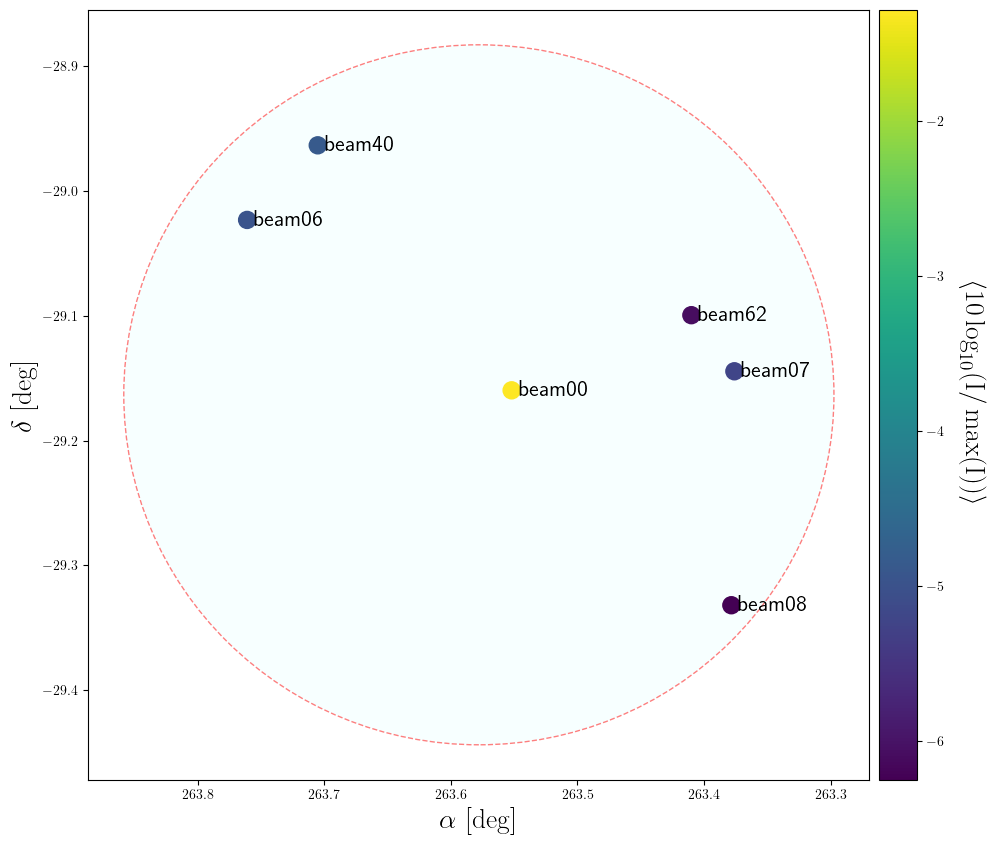

In [36]:
R = viewer.Recipe('MeerKAT-array_1-20240520T013741Z-original.bfr5')
ras, decs = np.degrees(R.ras), np.degrees(R.decs)

fov = 3e8/(2270e6*13.5) # radians
print(fov)

fov_deg = np.degrees(fov)
fov_asec = np.degrees(fov)*3600 # arcseconds

circ = plt.Circle((np.mean(ras), np.mean(decs)), radius = fov_deg/2, ec='red', fc = 'azure', ls='--', alpha=0.5)

fig, ax = plt.subplots(figsize=(12,10))
ax.add_patch(circ)
im = ax.scatter(beam_ras, beam_decs, s=150, c = beam_mean_db)
for i, xy in enumerate(zip(beam_ras,beam_decs)):
    ax.annotate(text=f'{beam_names[i]}', xy=xy, xytext = (5, 0), textcoords='offset points', size=16, ha='left', va='center')
cbar = fig.colorbar(im, ax=ax, pad=0.01)
cbar.set_label(r'$\mathrm{\langle 10 \log_{10}(I/\max(I)) \rangle}$', rotation=270, size=20, loc = 'center', labelpad=30)
ax.set_xlabel(r'$\mathrm{\alpha \ [deg]}$', size=20)
ax.set_ylabel(r'$\mathrm{\delta \ [deg]}$', size=20)
ax.invert_xaxis()
plt.savefig('mean power.png')
plt.show()

In [6]:
# fname = h5_data_list[6]

# t_arr = []
# h = h5py.File(fname, 'r') # open data
# print(fname)
# print(h.keys()) # view keys of data
# file_info = blimpy.h5diag.read_header(h)

# # Print out file inforamtion
# print('')
# print('File info:')
# for info in file_info: 
#     print(f'{info}: {file_info[info]}')

# # Extracting file information
# tsamp = file_info['tsamp']
# tstart = file_info['tstart']
# fch1 = file_info['fch1'] # first channel freq
# foff = file_info['foff'] # frequency offset
# ds = h['data']
# arr = ds[()] # dataset
# # t_vals = tstart + np.arange(0,arr.shape[0],1)*tsamp  # time array in MJD (probably)

# power_arr = np.squeeze(arr, axis=1)
# # power_arr = power_arr*foff + fch1
# # t_arr = np.array(t_arr)

# print('')
# print('Data shape:', power_arr.shape)
# h.close()

# n_0 = 0
# n_f = 524288
# fig, ax = plt.subplots(figsize=(10,2))
# ax.imshow(power_arr[:,n_0:n_f], 
#           cmap = 'viridis', 
#           extent = [fch1 + foff*n_0, fch1 + foff*n_f, tstart, tstart + tsamp*power_arr.shape[0]], 
#           aspect='auto')
# ax.set_xlabel(r'$\mathrm{Frequency \ [MHz]}$')
# ax.set_ylabel(r'$\mathrm {MJD}$')
# fig.tight_layout()
# plt.savefig('trial')
# plt.show()

In [7]:
# # Power plots with t on y axis and frequency on x axis
# n_vals = np.linspace(0, power_arr.shape[-1], 129, dtype=int)
# for i in range(n_vals.size-1):
#     n_0, n_f = n_vals[i], n_vals[i+1]
#     print(n_0, n_f)
#     fig, ax = plt.subplots(figsize=(10,2))
#     ax.imshow(power_arr[:,n_0:n_f], cmap = 'viridis', extent = [fch1 + foff*n_0, fch1 + foff*n_f, tstart, tstart + tsamp*power_arr.shape[0]], aspect='auto')
#     ax.set_xlabel(r'$\mathrm{Frequency \ [MHz]}$')
#     ax.set_ylabel(r'$\mathrm {MJD}$')
#     fig.tight_layout()
#     plt.savefig(os.path.abspath(fr'possible_signals/{fname[:-3]}/{n_0}_{n_f}.png'))
#     plt.show()

In [8]:
# power_sum_freq = np.sum(power_arr, axis=0) # power summed along frequency axis - total power at all time
# power_mean_freq = np.mean(power_arr, axis=0) # power mean along frequency axis - mean power at all time
# power_sum_t = np.sum(power_arr, axis=1)  # power summed along frequency axis - total power at all frequency
# power_mean_t = np.mean(power_arr, axis=1) # power mean along frequency axis - mean power at all frequency
# freq_arr = np.arange(0, power_arr.shape[1], 1)*foff + fch1
# t_arr = np.arange(0, power_arr.shape[0], 1)*tsamp + tstart

In [9]:
# fig, ax = plt.subplots(figsize=(10,4))
# ax.plot(t_arr, power_sum_t, lw=1)
# ax.set_ylabel(r'$\mathrm {Total \ power \ sum}$')
# ax.set_xlabel(r'$\mathrm {MJD}$')
# fig.tight_layout()
# plt.show()

# fig, ax = plt.subplots(figsize=(10,4))
# ax.plot(t_arr, power_mean_t, lw=1)
# ax.set_ylabel(r'$\mathrm {Mean \ power}$')
# ax.set_xlabel(r'$\mathrm {MJD}$')
# fig.tight_layout()
# plt.show()

# fig, ax = plt.subplots(figsize=(10,4))
# ax.plot(freq_arr, power_sum_freq, lw=1)
# ax.set_ylabel(r'$\mathrm {Total \ power \ sum}$')
# ax.set_xlabel(r'$\mathrm {Frequency \ [MHz]}$')
# fig.tight_layout()
# plt.show()

# fig, ax = plt.subplots(figsize=(10,4))
# ax.plot(freq_arr, power_mean_freq, lw=1)
# ax.set_ylabel(r'$\mathrm {Mean \ power}$')
# ax.set_xlabel(r'$\mathrm {Frequency \ [MHz]}$')
# ax.set_xlim(2270.3, 2270.5)
# fig.tight_layout()
# plt.show()
